# Aplicacion de Machine Learning en el Conjunto de Datos de Iris. 
En este notebook vamos a realizar un analisis y aplicacion de  Machine Learning en el conjunto de datos Iris, se utilizara el algoritmo de KNN. 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Lectura de datos desde el archivo CSV. 

In [25]:
df = pd.read_csv('archive/IRIS.csv')

Informacion general sobre el conjunto de datos Iris

In [26]:
print(df.describe())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [27]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [28]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
print(df.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Graficos comparativos entre caracteristicas del dataset

Grafico donde muestra la relacion entre el ancho del sepalo y el largo del sepalo por especie

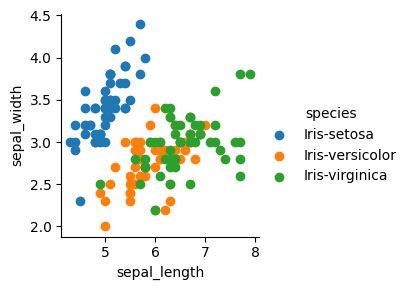

In [30]:
sns.FacetGrid(df, hue="species").map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.show()

Grafico donde se analiza la longitud del petalo y el ancho del petalo por especie

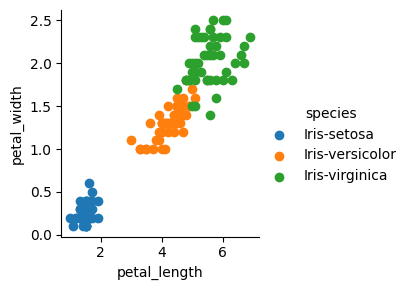

In [31]:
sns.FacetGrid(df, hue="species").map(plt.scatter, "petal_length", "petal_width").add_legend()
plt.show()

Este grafico muestra la distribucion de la logitud del sepalo de las plantas por especie. 

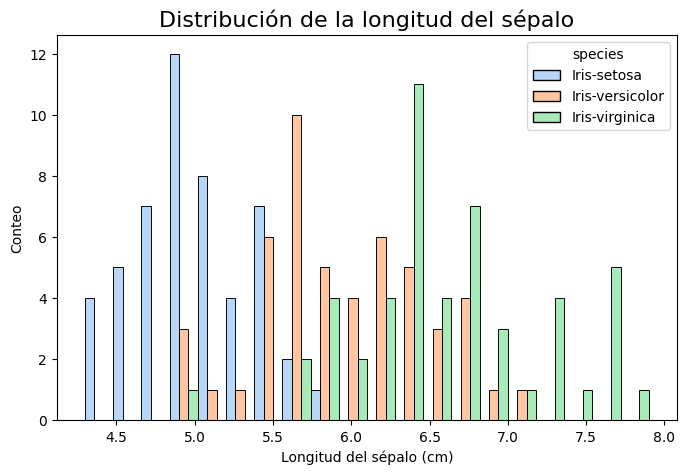

In [201]:
sns.set_palette("pastel")
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sepal_length', hue='species', multiple='dodge', bins=20)
plt.title('Distribución de la longitud del sépalo', fontsize=16)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Conteo')
plt.show()

En este grafico hacemos una relacion entre el largo del petalo y el largo del sepalo pero separado por especies. 

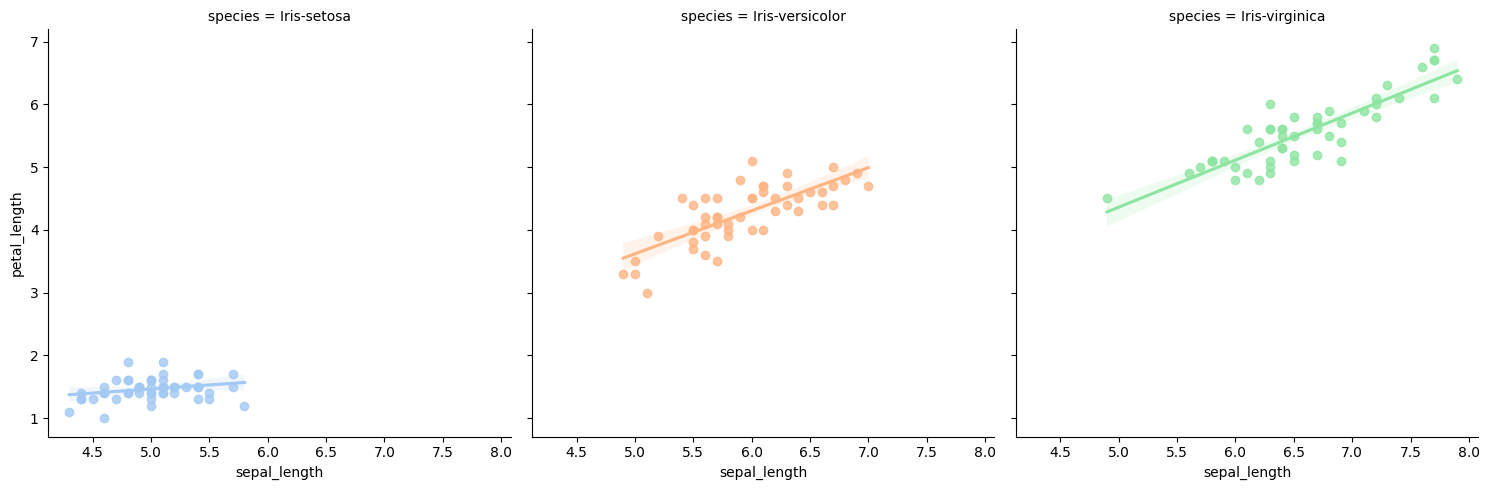

In [204]:
sns.lmplot(x='sepal_length', y='petal_length', data=df, hue='species', col='species')

plt.show()

# Implementacion del Algoritmo KNN
En esta seccion se realizo la implementacion del algoritmo Knn, inicialmente se realizo una separacion del los datos en set de entrenamiento y set de pruebas. Se selecciono un 80% de los datos como datos de entrenamiento y un 20 como datos de prueba. 



In [223]:

#separacion de datos y de las clases de las plantas.
X = df.iloc[:, :-1].values  
#X = df.iloc[:, [0, 2, 3]].values
#X = df.iloc[:, [0, 2]].values  # Usando las características 0 y 2
y = df.iloc[:, -1].values 

# Separar el conjunto de entrenamiento 
trainSize = int(0.8 * len(X))
dataTrain= X[:trainSize]
labelTrain= y[:trainSize]

#conjunto de entrenamiento
dataTest= X[trainSize:]
labelTest= y[trainSize:]


#calcular la distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

#Calculo de KNN
pred=[]
def knn_predict(dataTrain, pLabelTrain, dataTest, k):
    for x in dataTest:
        # Calcular distancias para los puntos
        distances = [euclidean_distance(x, data) for data in dataTrain]
        # Encontrar los k vecinos más cercanos
        k_indices = np.argsort(distances)[:k]
        # Votar
        kNearestLabels = pLabelTrain[k_indices]
        commonLabel = Counter(kNearestLabels).most_common(1)[0][0]
        pred.append(commonLabel)
    return np.array(pred)

# Analisis de resultados para diferentes valotes de K.

Resultados de la predicciones para un K con valor 8:

In [225]:
pred= []
pred = knn_predict(dataTrain, labelTrain, dataTest, k=8)
accuracy = accuracy_score(labelTest, pred)

print("Resultados del algoritmo KNN con k=8:")
print("-----------------------------")
print("Predicciones:")
print(pred)
print("Valores de prueba:")
print(labelTest)
print("-----------------------------")
print("Accuracy:", accuracy*100, "%")


Resultados del algoritmo KNN con k=8:
-----------------------------
Predicciones:
['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']
Valores de prueba:
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virgi

Resultados de la predicciones para un K con valor 3:

In [241]:
pred=[]
pred = knn_predict(dataTrain, labelTrain, dataTest, k=3)
accuracy = accuracy_score(labelTest, pred)
print("Resultados del algoritmo KNN con k=3:")
print("-----------------------------")
print("Predicciones:")
print(pred)
print("Valores de prueba:")
print(labelTest)
print("-----------------------------")
print("Accuracy:", accuracy*100, "%")

Resultados del algoritmo KNN con k=3:
-----------------------------
Predicciones:
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor']
Valores de prueba:
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virg

Resultados de la predicciones para un K con valor 2

In [243]:
pred=[]
pred = knn_predict(dataTrain, labelTrain, dataTest, k=12)
accuracy = accuracy_score(labelTest, pred)
print("Resultados del algoritmo KNN con k=10:")
print("-----------------------------")
print("Predicciones:")
print(pred)
print("Valores de prueba:")
print(labelTest)
print("-----------------------------")
print("Accuracy:", accuracy*100, "%")

Resultados del algoritmo KNN con k=10:
-----------------------------
Predicciones:
['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']
Valores de prueba:
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virg

In [245]:
pred=[]
pred = knn_predict(dataTrain, labelTrain, dataTest, k=20)
accuracy = accuracy_score(labelTest, pred)
print("Resultados del algoritmo KNN con k=20:")
print("-----------------------------")
print("Predicciones:")
print(pred)
print("Valores de prueba:")
print(labelTest)
print("-----------------------------")
print("Accuracy:", accuracy*100, "%")

Resultados del algoritmo KNN con k=20:
-----------------------------
Predicciones:
['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor']
Valores de prueba:
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-v